In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
idx = pd.IndexSlice

In [3]:
df = pd.read_excel("../data/kemija loša.xlsx", decimal = ",", thousands = ".")
df.head()

Vodni tip  Temperatura vode (°C)  \
Žirovnica, Dvor, utok u Unu MAX            4              21.000000   
                            MIN            4               1.000000   
                            SR.VR.         4               8.666667   
Glina, Glina                MAX            4              19.000000   
                            MIN            4              10.000000   

                                    pH vrijednost  \
Žirovnica, Dvor, utok u Unu MAX          8.120000   
                            MIN          7.900000   
                            SR.VR.       8.021667   
Glina, Glina                MAX          8.320000   
                            MIN          8.110000   

                                    Električna vodljivost (μS/cm)  \
Žirovnica, Dvor, utok u Unu MAX                        364.000000   
                            MIN                        185.300000   
                            SR.VR.                     263.383333   
Glina, Glina                MAX                        427.000000   
                            MIN                        323.000000   

                                    Ukupne suspendirane tvari (mg/l)  \
Žirovnica, Dvor, utok u Unu MAX                             9.200000   
                            MIN                             1.800000   
                            SR.VR.                          5.433333   
Glina, Glina                MAX                            13.000000   
                            MIN                             2.200000   

                                    Alkalitet m-vrijednost (mgCaCO₃/l)  \
Žirovnica, Dvor, utok u Unu MAX                                  188.0   
                            MIN                                   80.0   
                            SR.VR.                               132.0   
Glina, Glina                MAX                                  255.0   
                            MIN                                  165.0   

                                    Alkalitet p-vrijednost (mgCaCO₃/l)  \
Žirovnica, Dvor, utok u Unu MAX                                    0.0   
                            MIN                                    0.0   
                            SR.VR.                                 0.0   
Glina, Glina                MAX                                   10.0   
                            MIN                                    0.0   

                                    Tvrdoća ukupna (mgCaCO₃/l)  \
Žirovnica, Dvor, utok u Unu MAX                            NaN   
                            MIN                            NaN   
                            SR.VR.                         NaN   
Glina, Glina                MAX                            NaN   
                            MIN                            NaN   

                                    Otopljeni kisik (mgO₂/l)  \
Žirovnica, Dvor, utok u Unu MAX                       13.100   
                            MIN                        7.970   
                            SR.VR.                    11.065   
Glina, Glina                MAX                       14.000   
                            MIN                        8.990   

                                    Zasićenje kisikom (%) ...  \
Žirovnica, Dvor, utok u Unu MAX                 97.800000 ...   
                            MIN                 89.500000 ...   
                            SR.VR.              92.633333 ...   
Glina, Glina                MAX                151.200000 ...   
                            MIN                 88.400000 ...   

                                    Nitriti (mgN/l)  Nitrati (mgN/l)  \
Žirovnica, Dvor, utok u Unu MAX            0.010000         0.590000   
                            MIN            0.001500         0.230000   
                            SR.VR.         0.004917         0.446667   
Glina, Glina                MAX            0.020000         1.090000   
                  

In [19]:
df.loc[:, "Vodni tip"] = df.loc[:, "Vodni tip"].astype(str)
bioloskiParametri = list(df.columns[-3:])
kemijskiParametri = list(df.columns[1:-3])

/home/dom/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


## Opisne statistike

Izbacujemo vodni tip.<br>
Izbacujemo mulitIndex i radimo samo sa srednjom vrijednosti

In [20]:
frame = df.loc[idx[:, "SR.VR."], :].reset_index().drop(["level_0", "level_1"], axis = 1)
frame.head()

,Vodni tip,Temperatura vode (°C),pH vrijednost,Električna vodljivost (μS/cm),Ukupne suspendirane tvari (mg/l),Alkalitet m-vrijednost (mgCaCO₃/l),Alkalitet p-vrijednost (mgCaCO₃/l),Tvrdoća ukupna (mgCaCO₃/l),Otopljeni kisik (mgO₂/l),Zasićenje kisikom (%),...,Nitriti (mgN/l),Nitrati (mgN/l),Kjeldahl dušik,Ukupni dušik (mgN/l),Organski dušik (mgN/l),Ortofosfati (mgP/l),Ukupni fosfor (mgP/l),%EPT,EPT-S,BP
0,4,8.666667,8.021667,263.383333,5.433333,132.000000,0.0,NaN,11.065000,92.633333,...,0.004917,0.446667,0.505000,0.956000,0.458500,0.009,0.029333,35.938,11,22
1,4,14.500000,8.245000,393.333333,5.600000,212.000000,3.0,NaN,10.498333,103.633333,...,0.011500,0.805000,0.445000,1.256500,0.356667,0.011,0.045167,9.259,5,23
2,4,10.283333,7.966667,446.000000,7.666667,237.916667,NaN,NaN,11.550000,102.766667,...,0.022333,0.666000,0.184333,0.871000,0.129167,0.005,0.137000,47.368,12,20
3,7,11.000000,8.269231,369.461538,4.846154,196.730769,NaN,NaN,11.700000,106.061538,...,0.002500,0.702077,0.091462,0.790462,0.069462,0.005,0.039308,65.116,14,15
4,7,9.530769,8.238462,346.615385,6.307692,178.230769,NaN,NaN,12.357692,108.392308,...,0.002500,0.746769,0.122308,0.867538,0.113308,0.005,0.032923,61.364,14,18


In [21]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 23 columns):
Vodni tip                             329 non-null object
Temperatura vode (°C)                 329 non-null float64
pH vrijednost                         328 non-null float64
Električna vodljivost (μS/cm)         329 non-null float64
Ukupne suspendirane tvari (mg/l)      325 non-null float64
Alkalitet m-vrijednost (mgCaCO₃/l)    326 non-null float64
Alkalitet p-vrijednost (mgCaCO₃/l)    192 non-null float64
Tvrdoća ukupna (mgCaCO₃/l)            244 non-null float64
Otopljeni kisik (mgO₂/l)              327 non-null float64
Zasićenje kisikom (%)                 327 non-null float64
BPK₅ (mgO₂/l)                         324 non-null float64
KPK-Mn (mgO₂/l)                       325 non-null float64
Amonij (mgN/l)                        325 non-null float64
Nitriti (mgN/l)                       325 non-null float64
Nitrati (mgN/l)                       325 non-null float64
Kjeldahl du

Postoji problem s električnom vodljivosti - castana je u object.<br>
Problem je u reprezentaciji broja npr. 1.290,75 - rješeno dodavanjem thousands = "." u read_excel

In [22]:
frame.loc[:, kemijskiParametri].head()

,Temperatura vode (°C),pH vrijednost,Električna vodljivost (μS/cm),Ukupne suspendirane tvari (mg/l),Alkalitet m-vrijednost (mgCaCO₃/l),Alkalitet p-vrijednost (mgCaCO₃/l),Tvrdoća ukupna (mgCaCO₃/l),Otopljeni kisik (mgO₂/l),Zasićenje kisikom (%),BPK₅ (mgO₂/l),KPK-Mn (mgO₂/l),Amonij (mgN/l),Nitriti (mgN/l),Nitrati (mgN/l),Kjeldahl dušik,Ukupni dušik (mgN/l),Organski dušik (mgN/l),Ortofosfati (mgP/l),Ukupni fosfor (mgP/l)
0,8.666667,8.021667,263.383333,5.433333,132.000000,0.0,NaN,11.065000,92.633333,1.000000,3.213333,0.051667,0.004917,0.446667,0.505000,0.956000,0.458500,0.009,0.029333
1,14.500000,8.245000,393.333333,5.600000,212.000000,3.0,NaN,10.498333,103.633333,1.000000,2.700000,0.083333,0.011500,0.805000,0.445000,1.256500,0.356667,0.011,0.045167
2,10.283333,7.966667,446.000000,7.666667,237.916667,NaN,NaN,11.550000,102.766667,1.406667,1.938333,0.055167,0.022333,0.666000,0.184333,0.871000,0.129167,0.005,0.137000
3,11.000000,8.269231,369.461538,4.846154,196.730769,NaN,NaN,11.700000,106.061538,0.933846,1.260769,0.022462,0.002500,0.702077,0.091462,0.790462,0.069462,0.005,0.039308
4,9.530769,8.238462,346.615385,6.307692,178.230769,NaN,NaN,12.357692,108.392308,1.353077,1.825385,0.008154,0.002500,0.746769,0.122308,0.867538,0.113308,0.005,0.032923


In [23]:
frame.loc[:, bioloskiParametri].head()

,%EPT,EPT-S,BP
0,35.938,11,22
1,9.259,5,23
2,47.368,12,20
3,65.116,14,15
4,61.364,14,18


In [24]:
vodniTipovi = list(frame.loc[:, "Vodni tip"].unique())
vodniTipovi

['4', '7', '3B', '6', '2A', '5B', '5A', '5D', '5C', '2B', '1', '3A']

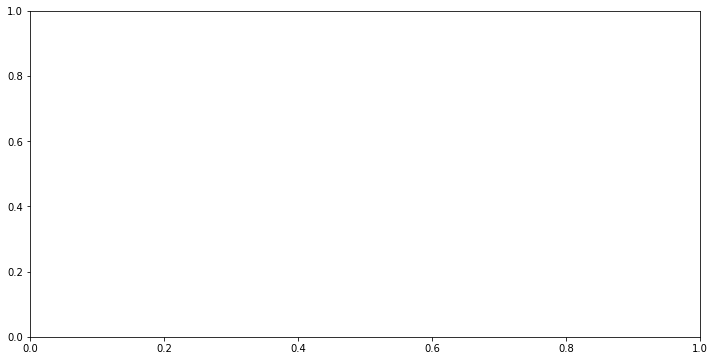

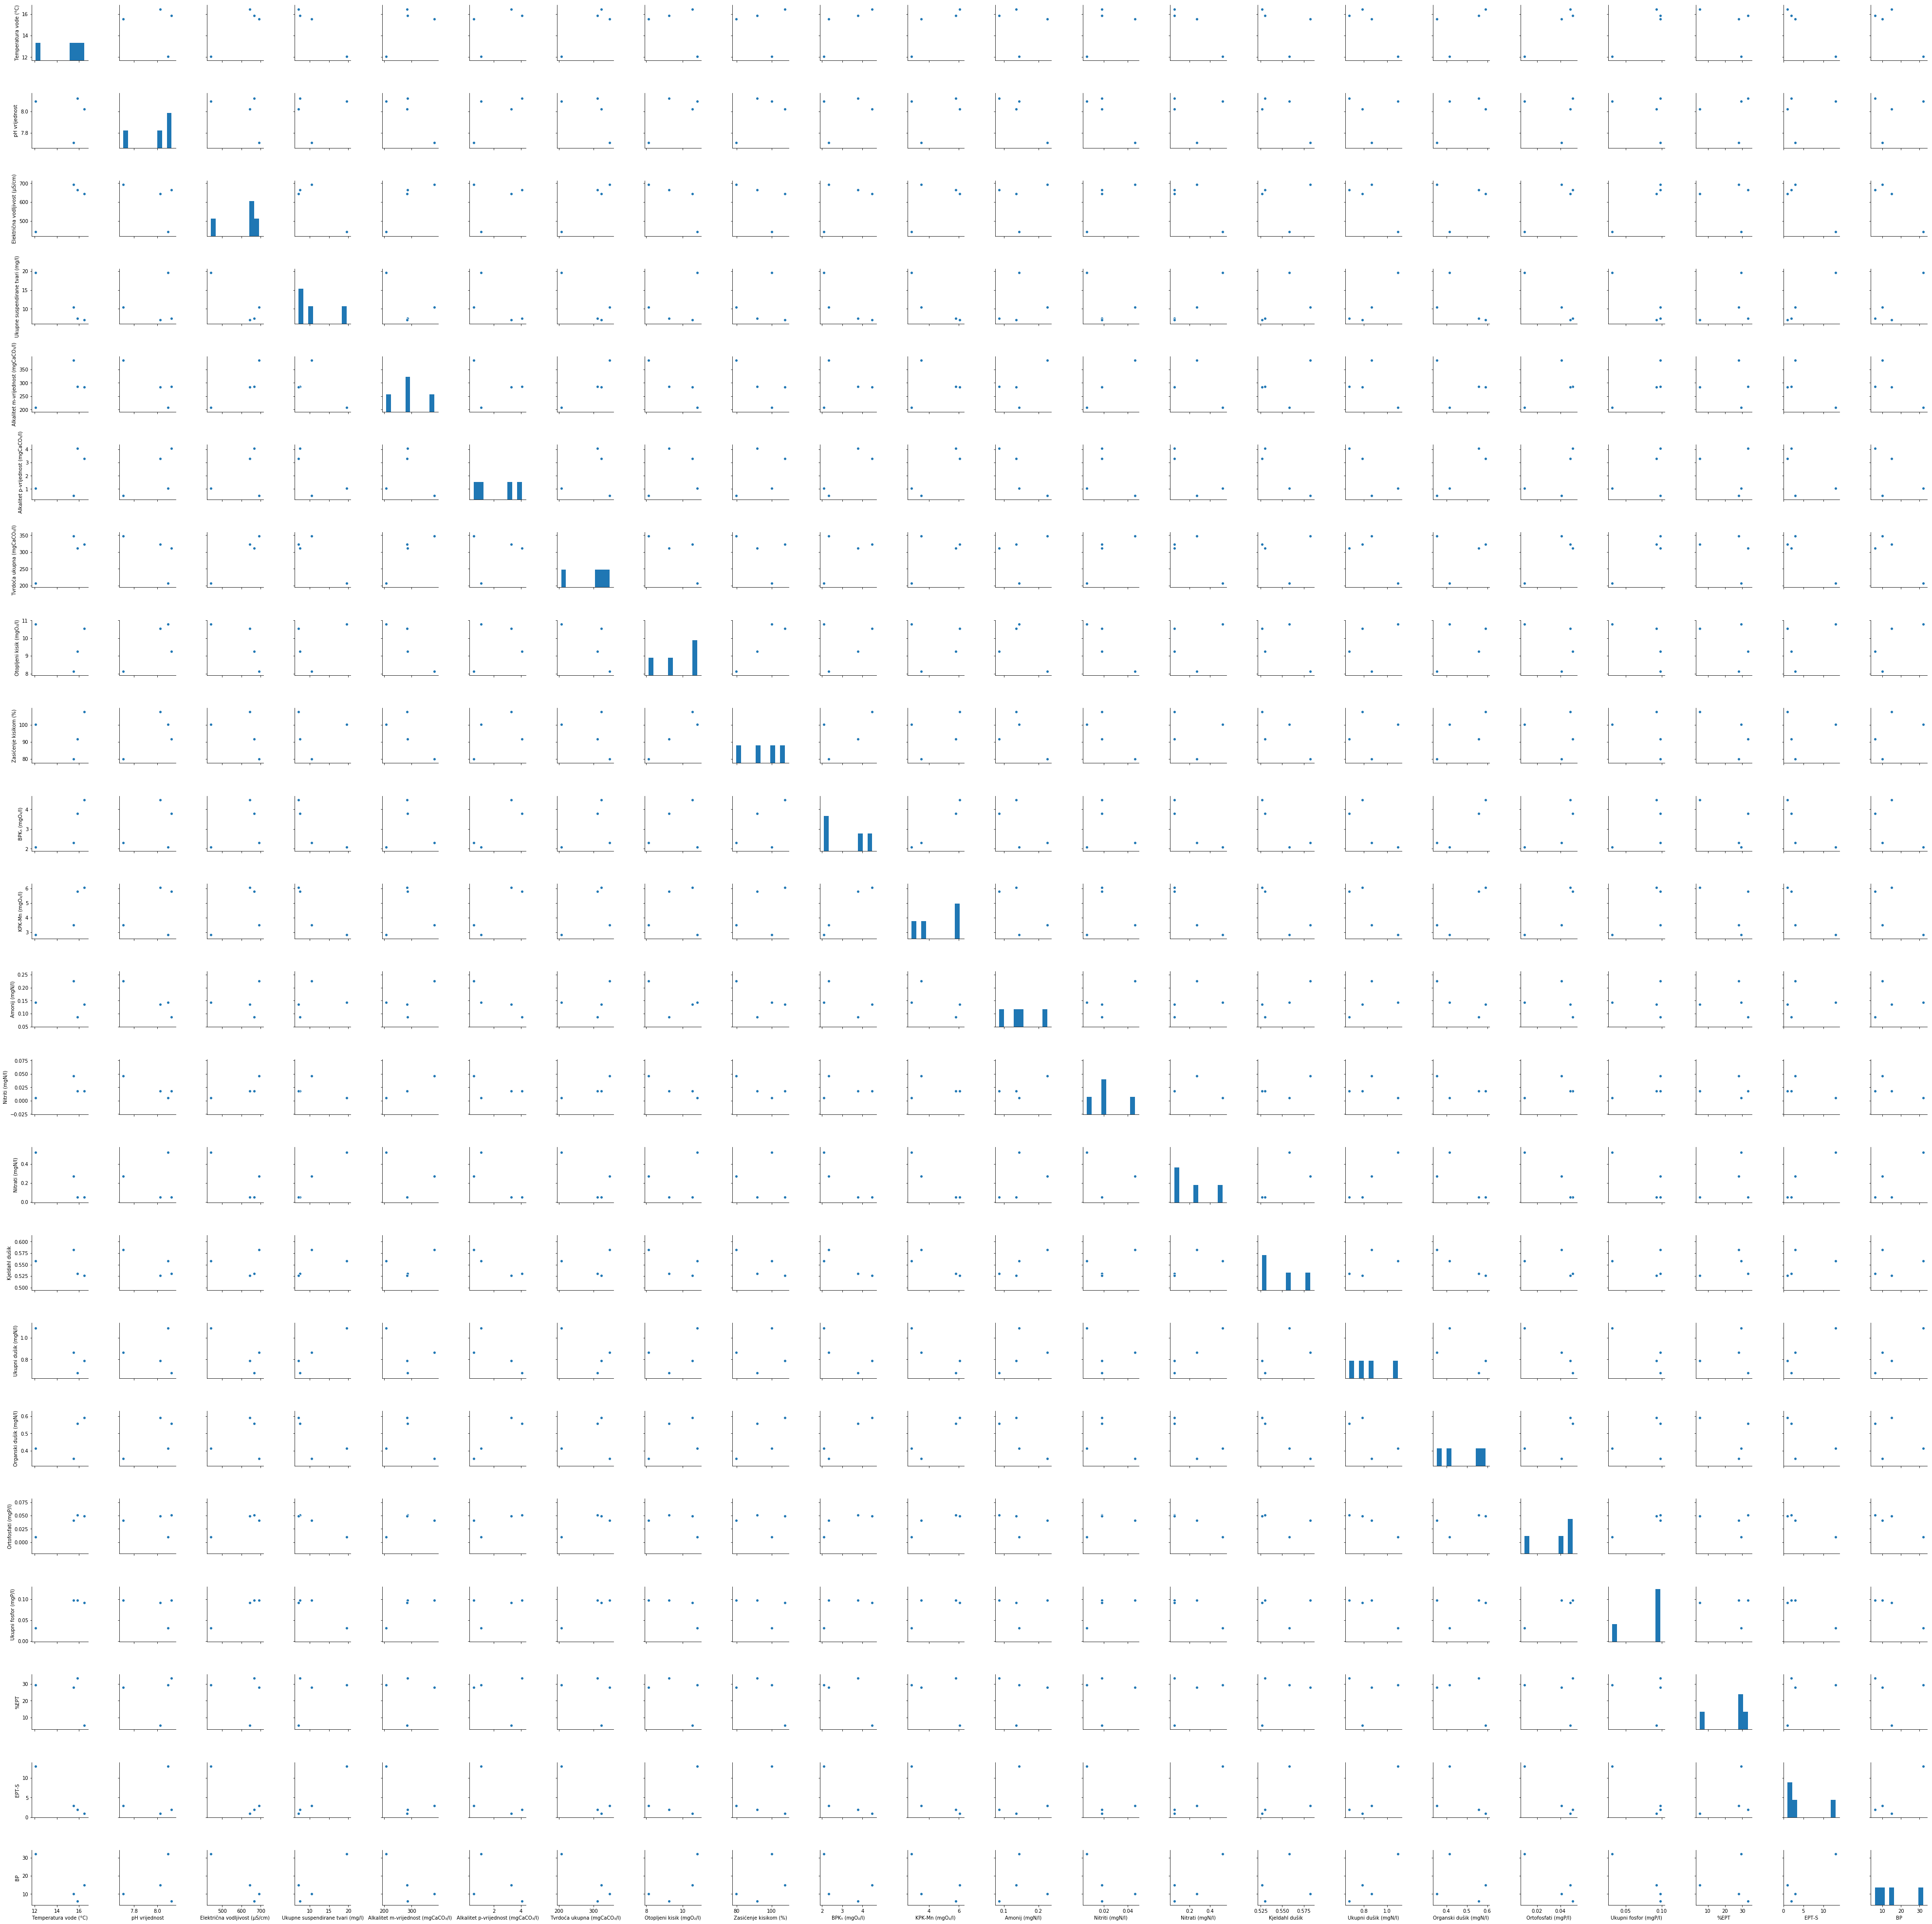

In [72]:
def pairPlot(frame):
    fig, ax = plt.subplots(figsize = (12, 6))
    

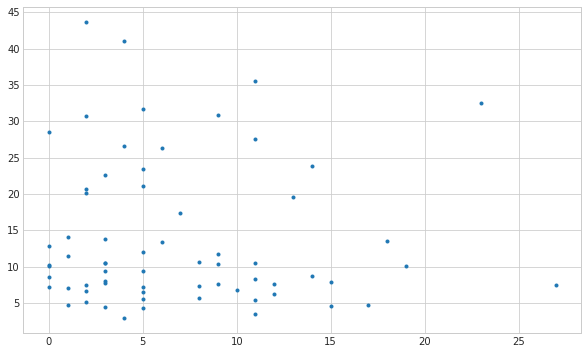

In [86]:
fig, ax = plt.subplots(figsize = (10, 6))
figFrame = frame.loc[frame.loc[:, "Vodni tip"] == "4"].drop(["Vodni tip"], axis = 1)
figb1 = figFrame.loc[:, bioloskiParametri[1]]
figk3 = figFrame.loc[:, kemijskiParametri[3]]
ax.plot(figb1.astype(float), figk3, marker = ".", linestyle = "")
plt.show(fig)

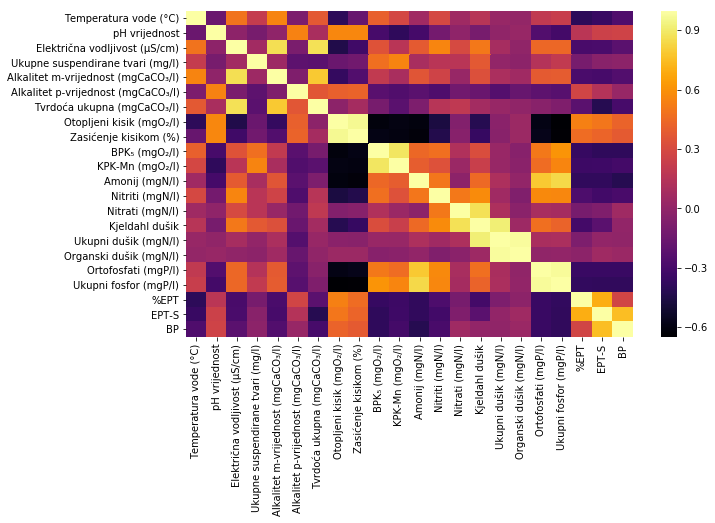

In [71]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(tmpFrame.corr().applymap(lambda x: "{:.4f}".format(x)).astype(float), cmap = "inferno", ax = ax)
plt.show(fig)